In [1]:
import pandas as pd
import upsetplot
import matplotlib.pyplot as plt
import os

### Define paths and constants

In [2]:
base_path = "/users/amtseng/tfmodisco/results/peaks_without_hits"

tf_names = [                                                                    
    "E2F6", "FOXA2", "SPI1", "CEBPB", "MAX", "GABPA", "MAFK", "JUND", "NR3C1-reddytime", "REST"
]                                                                               
tf_num_tasks = {                                                                
    "E2F6": 2,                                                                  
    "FOXA2": 4,                                                                 
    "SPI1": 4,                                                                  
    "CEBPB": 7,                                                                 
    "MAX": 7,                                                                   
    "GABPA": 9,                                                                 
    "MAFK": 9,                                                                  
    "JUND": 14,                                                                 
    "NR3C1-reddytime": 16,                                                      
    "REST": 20                                                                  
}

In [3]:
REST_task_inds_and_cell_types = [
    (0, "GM12878"),
    (3, "HepG2"),
    (7, "K562"),
    (8, "HepG2"),
    (12, "A549"),
    (13, "GM12878"),
    (15, "K562"),
    (17, "liver"),
    (19, "liver")
]

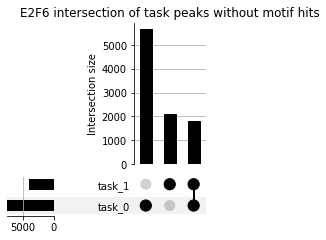

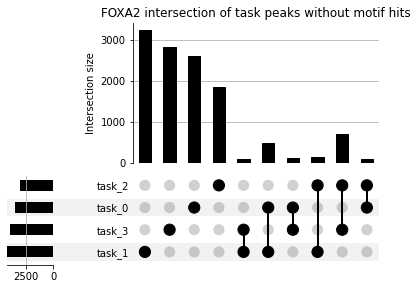

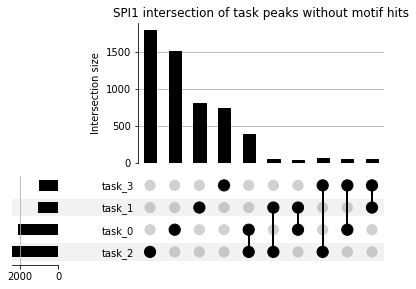

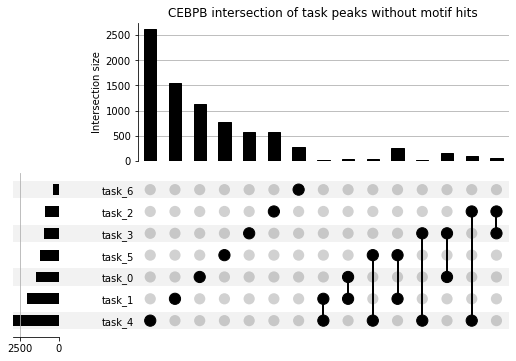

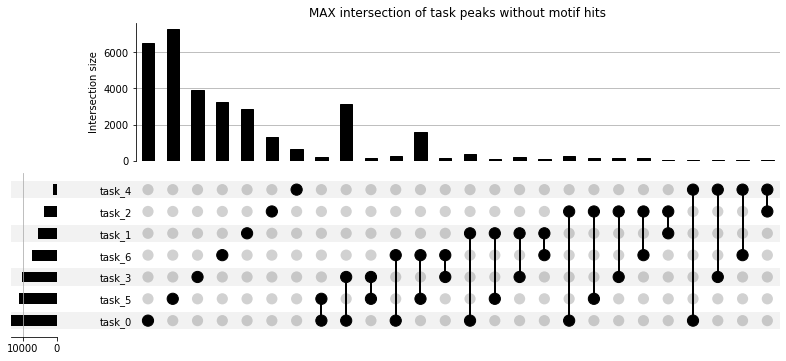

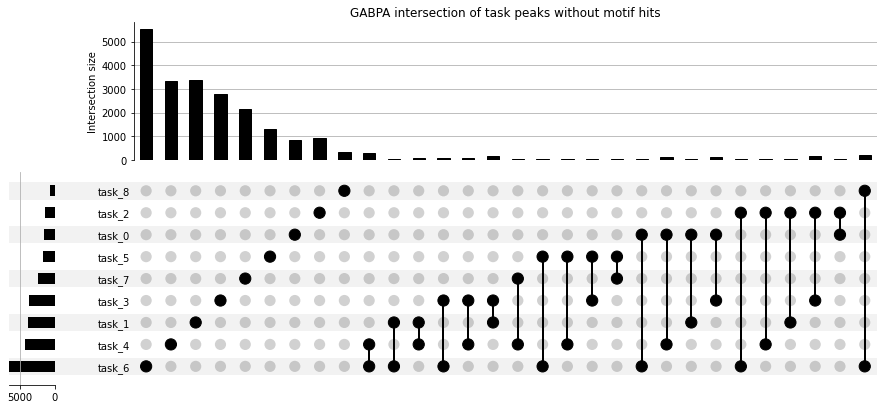

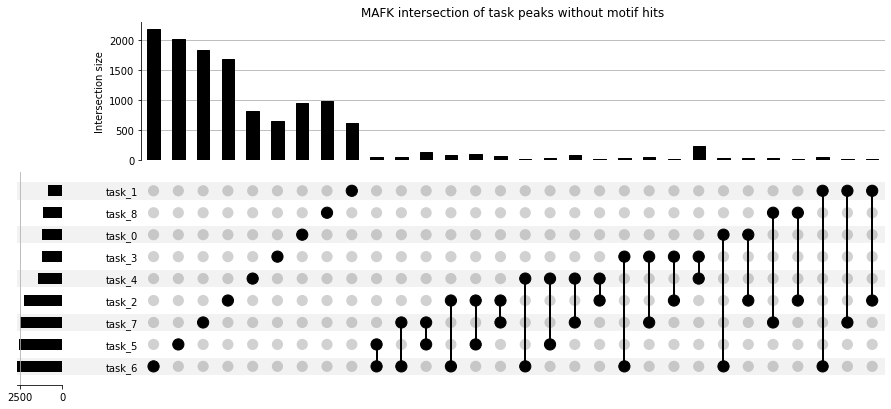

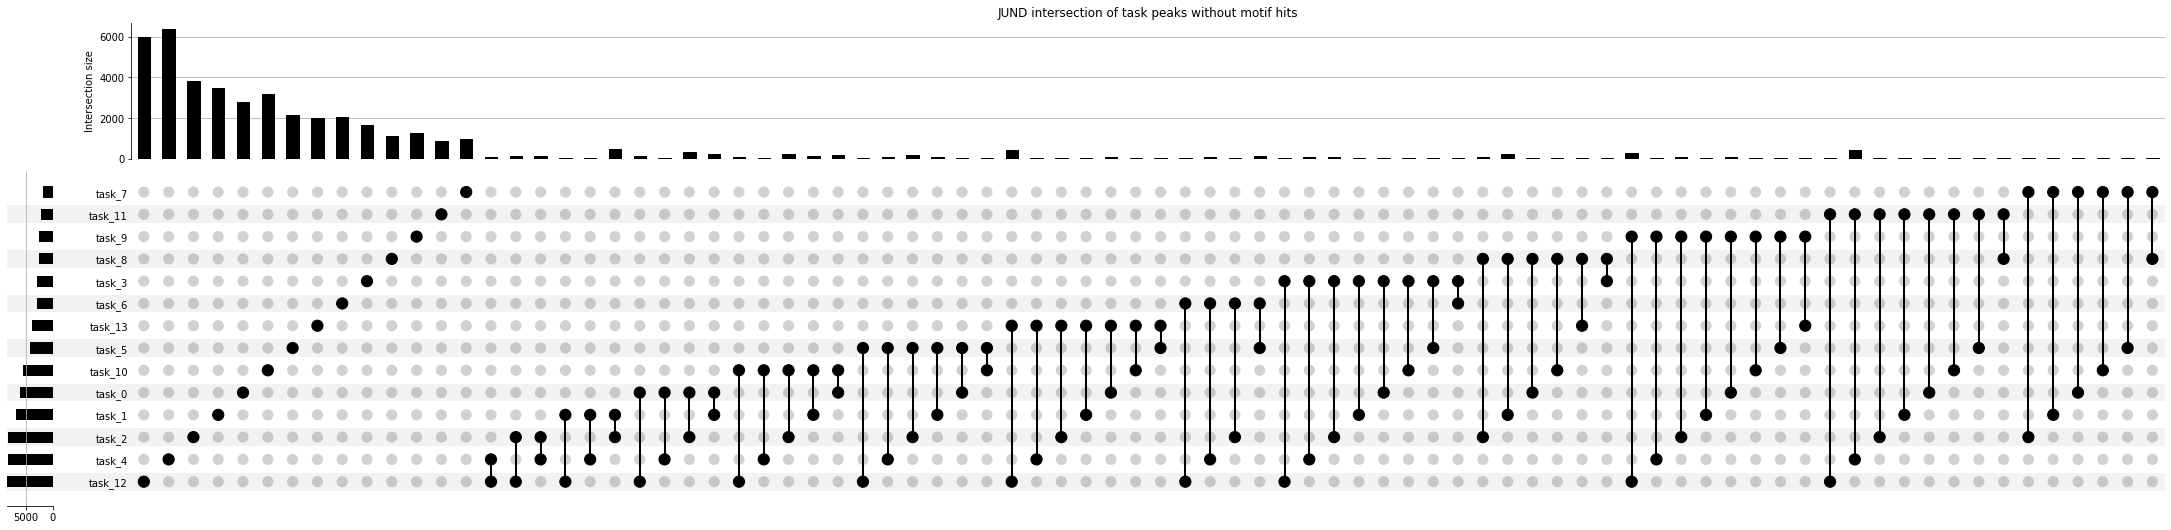

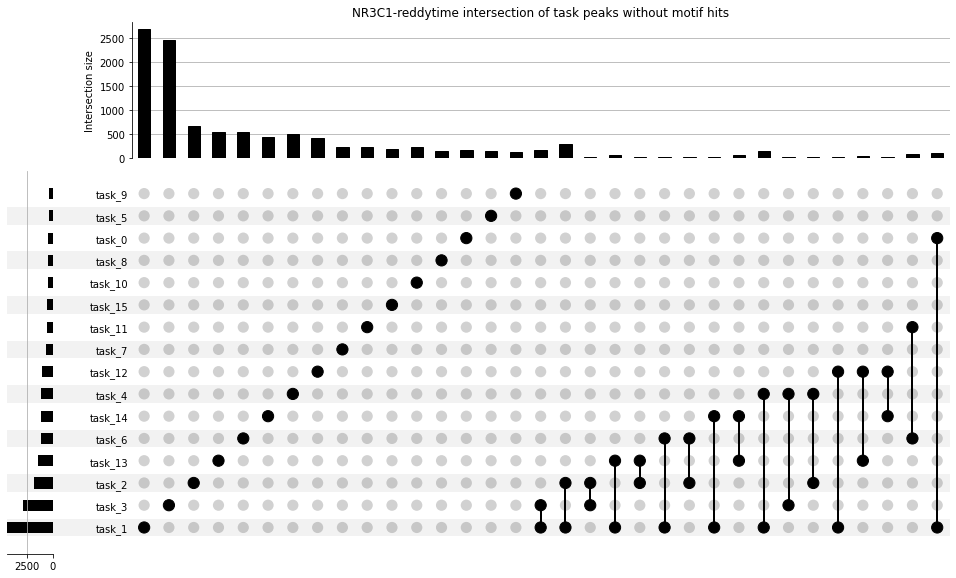

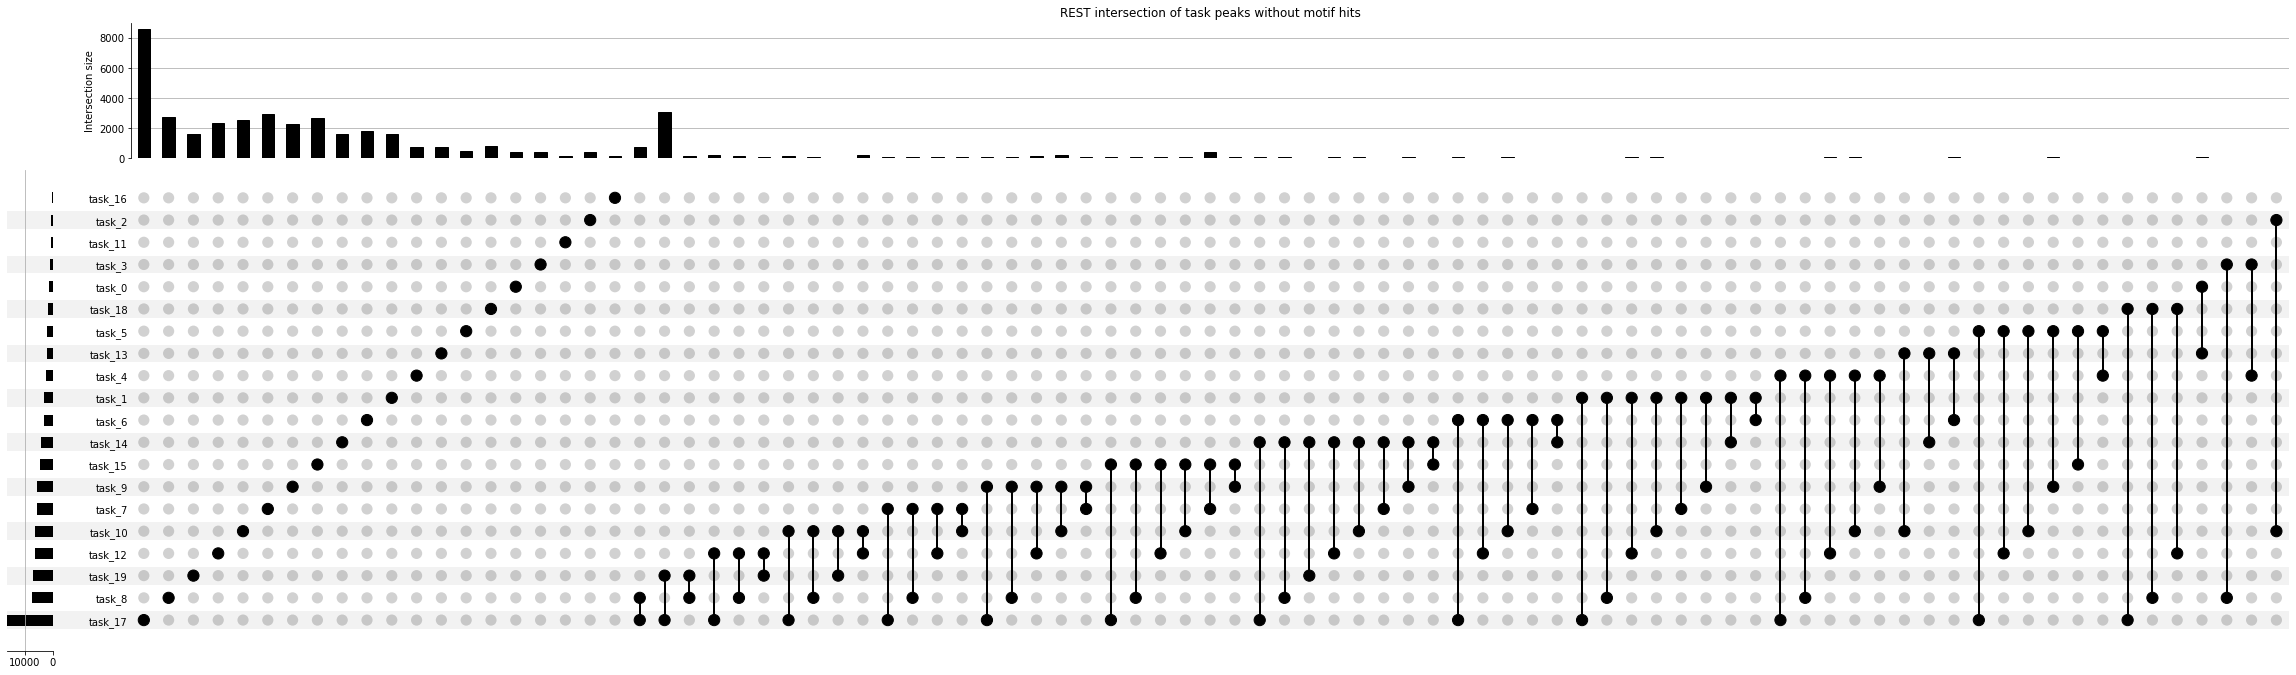

In [4]:
for tf_name in tf_names:
    # Import indicator table
    table_path = os.path.join(base_path, "%s_task_specific_peaks_without_tfm_motif_hits_profile.bed.gz" % tf_name)
    table = pd.read_csv(
        table_path, sep="\t", header=None, index_col=False
    )
    
    task_cols = ["task_%d" % i for i in range(tf_num_tasks[tf_name])]
    table.columns = ["coord"] + task_cols
    
    # Convert table to UpSet format
    data = upsetplot.from_indicators(table[task_cols].astype(bool))
    
    # Create plot
    upsetplot.plot(data, subset_size="count", max_degree=2, min_subset_size=20)
    plt.title("%s intersection of task peaks without motif hits" % tf_name)
    plt.show()

### Make UpSet plots for REST peaks without motifs overlapping with DNase-seq peaks

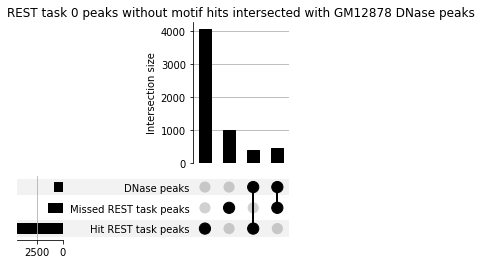

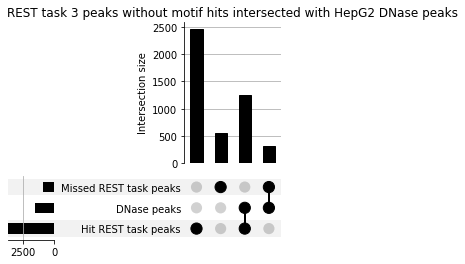

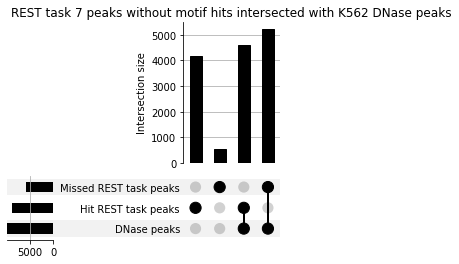

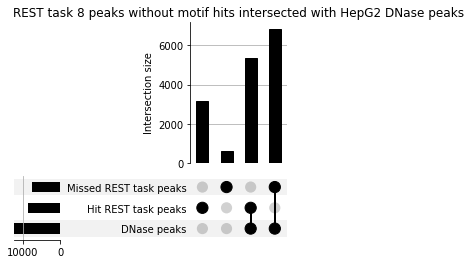

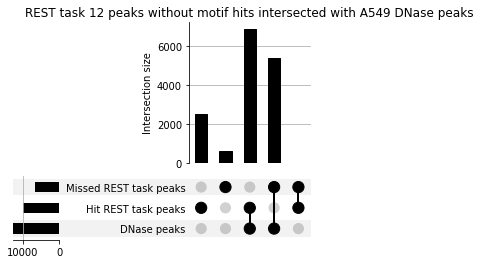

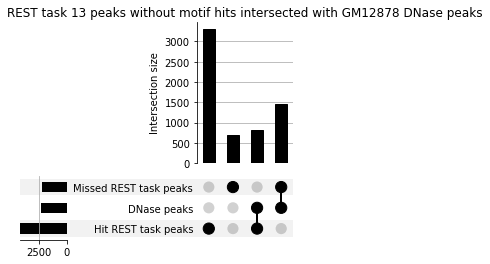

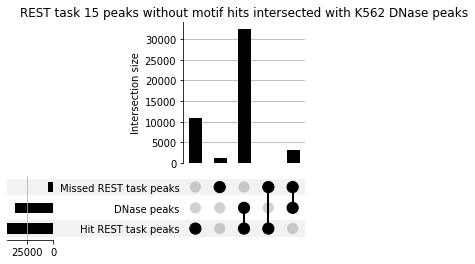

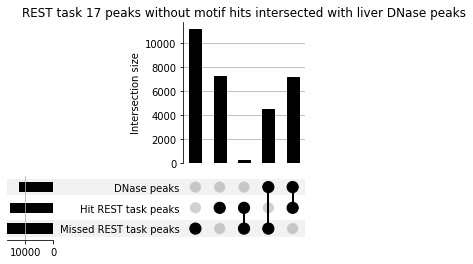

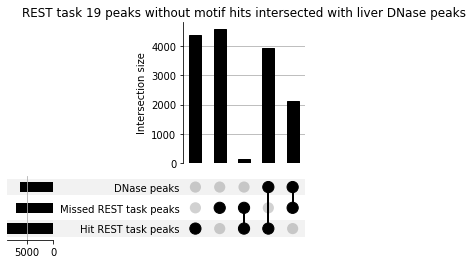

In [5]:
for task_index, cell_type in REST_task_inds_and_cell_types:
    # Import indicator table
    table_path = os.path.join(base_path, "REST_task%d_%s_peaks_and_dnase_profile.bed.gz" % (task_index, cell_type))
    table = pd.read_csv(
        table_path, sep="\t", header=None, index_col=False
    )
    
    table.columns = ["coord", "Hit REST task peaks", "Missed REST task peaks", "DNase peaks"]
    ind_cols = list(table)[1:]
    
    # Convert table to UpSet format
    data = upsetplot.from_indicators(table[ind_cols].astype(bool))
    
    # Create plot
    upsetplot.plot(data, subset_size="count", max_degree=2, min_subset_size=20)
    plt.title("REST task %d peaks without motif hits intersected with %s DNase peaks" % (task_index, cell_type))
    plt.show()